In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
#from model_equations_separate_NC import *
from model_equations_separate_NC_store_numba import *


In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [5]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


In [7]:
dpath = '/fast_data/Osnat/RECYCLE_MODEL/results/shgo2/out'
dpath = 'results'

In [46]:
os.listdir(dpath)

['sobol_ponly_df.csv.gz',
 'sobol_ponly_tmp_df.csv.gz',
 'sobol_ponly_tmp_sum.csv.gz',
 'vpro_ponly_mse.csv.gz',
 'sobol_ponly_tmp_mse.csv.gz',
 'vpro_ponly_df.csv.gz',
 'sobol_ponly_sum.csv.gz',
 'vpro_ponly_sum.csv.gz',
 'sobol_ponly_mse.csv.gz']

In [47]:
tmse_df = pd.read_csv(os.path.join(dpath,'sobol_ponly_tmp_mse.csv.gz',))


In [48]:
tmse_df[['id', 'media', 'which', 'model', 'hash']] = tmse_df.run_id.str.rsplit('_', n=4, expand=True)


In [50]:
tmse_df.groupby('media').compare_points.describe()

,count,mean,std,min,25%,50%,75%,max
media,,,,,,,,
lowN,2154.0,73.733983,1.796494,43.0,74.0,74.0,74.0,74.0
pro99,2148.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


In [ ]:
tmse_df.compare_points

In [10]:
df = pd.read_csv(os.path.join(dpath,'sobol_ponly_df.csv.gz',))
mse_df = pd.read_csv(os.path.join(dpath,'sobol_ponly_mse.csv.gz',))
sum_df = pd.read_csv(os.path.join(dpath,'sobol_ponly_sum.csv.gz',))

In [12]:
sum_df.run_id.head().unique()

array(['shgo2_sobol_407_lowN_ponly_OVERFLOW_h-2074384540759412348',
       'shgo2_sobol_535_pro99_ponly_MIXOTROPH_h402169954313498451',
       'shgo2_sobol_92_pro99_ponly_MIXOTROPH_h402169954313498451',
       'shgo2_sobol_603_lowN_ponly_ROS_h5853139000967720769',
       'shgo2_sobol_373_pro99_ponly_ROS_h5853139000967720769'],
      dtype=object)

In [17]:
sum_df[['id', 'media', 'which', 'model', 'hash']] = sum_df.run_id.str.rsplit('_', n=4, expand=True)
mse_df[['id', 'media', 'which', 'model', 'hash']] = mse_df.run_id.str.rsplit('_', n=4, expand=True)
    df[['id', 'media', 'which', 'model', 'hash']] =     df.run_id.str.rsplit('_', n=4, expand=True)


In [ ]:
mse_df['ref_compare_points'] = mse_df
bad_ids = mse_df.loc[mse_df.media]

In [45]:
mse_df.groupby('media').compare_points.describe()

,count,mean,std,min,25%,50%,75%,max
media,,,,,,,,
lowN,28371.0,73.519298,2.505547,40.0,74.0,74.0,74.0,74.0
pro99,28188.0,1.999894,0.010316,1.0,2.0,2.0,2.0,2.0


In [24]:
mse_df['RMSE'] = mse_df['RMSE'].clip(upper=1e4)
mse_df['lRMSE'] = mse_df['lRMSE'].clip(upper=20)



In [37]:
mse_df.describe()

,RMSE_Bptotal[N],RMSE_Bptotal[C],RMSE_log_Bptotal[N],RMSE_log_Bptotal[C],compare_points,RMSE,lRMSE
count,5.655900e+04,5.655900e+04,56559.000000,56559.000000,56559.000000,56559.000000,56559.000000
mean,1.586734e+135,1.051211e+136,3.059752,2.908656,37.875298,3509.486390,7.046936
std,2.175618e+137,1.441347e+138,5.138703,5.297950,35.803834,4090.424288,4.059058
min,0.000000e+00,2.295570e+00,2.125153,0.760869,1.000000,0.000000,1.988687
25%,5.495883e+00,4.495097e+01,2.384592,1.893819,2.000000,247.475033,4.571967
50%,1.215863e+01,9.243661e+01,2.613706,2.042212,52.000000,1114.603380,4.945447
75%,3.621236e+01,3.034501e+02,2.613706,3.069773,74.000000,10000.000000,7.899884
max,2.987309e+139,1.979092e+140,151.654168,152.790014,74.000000,10000.000000,20.000000


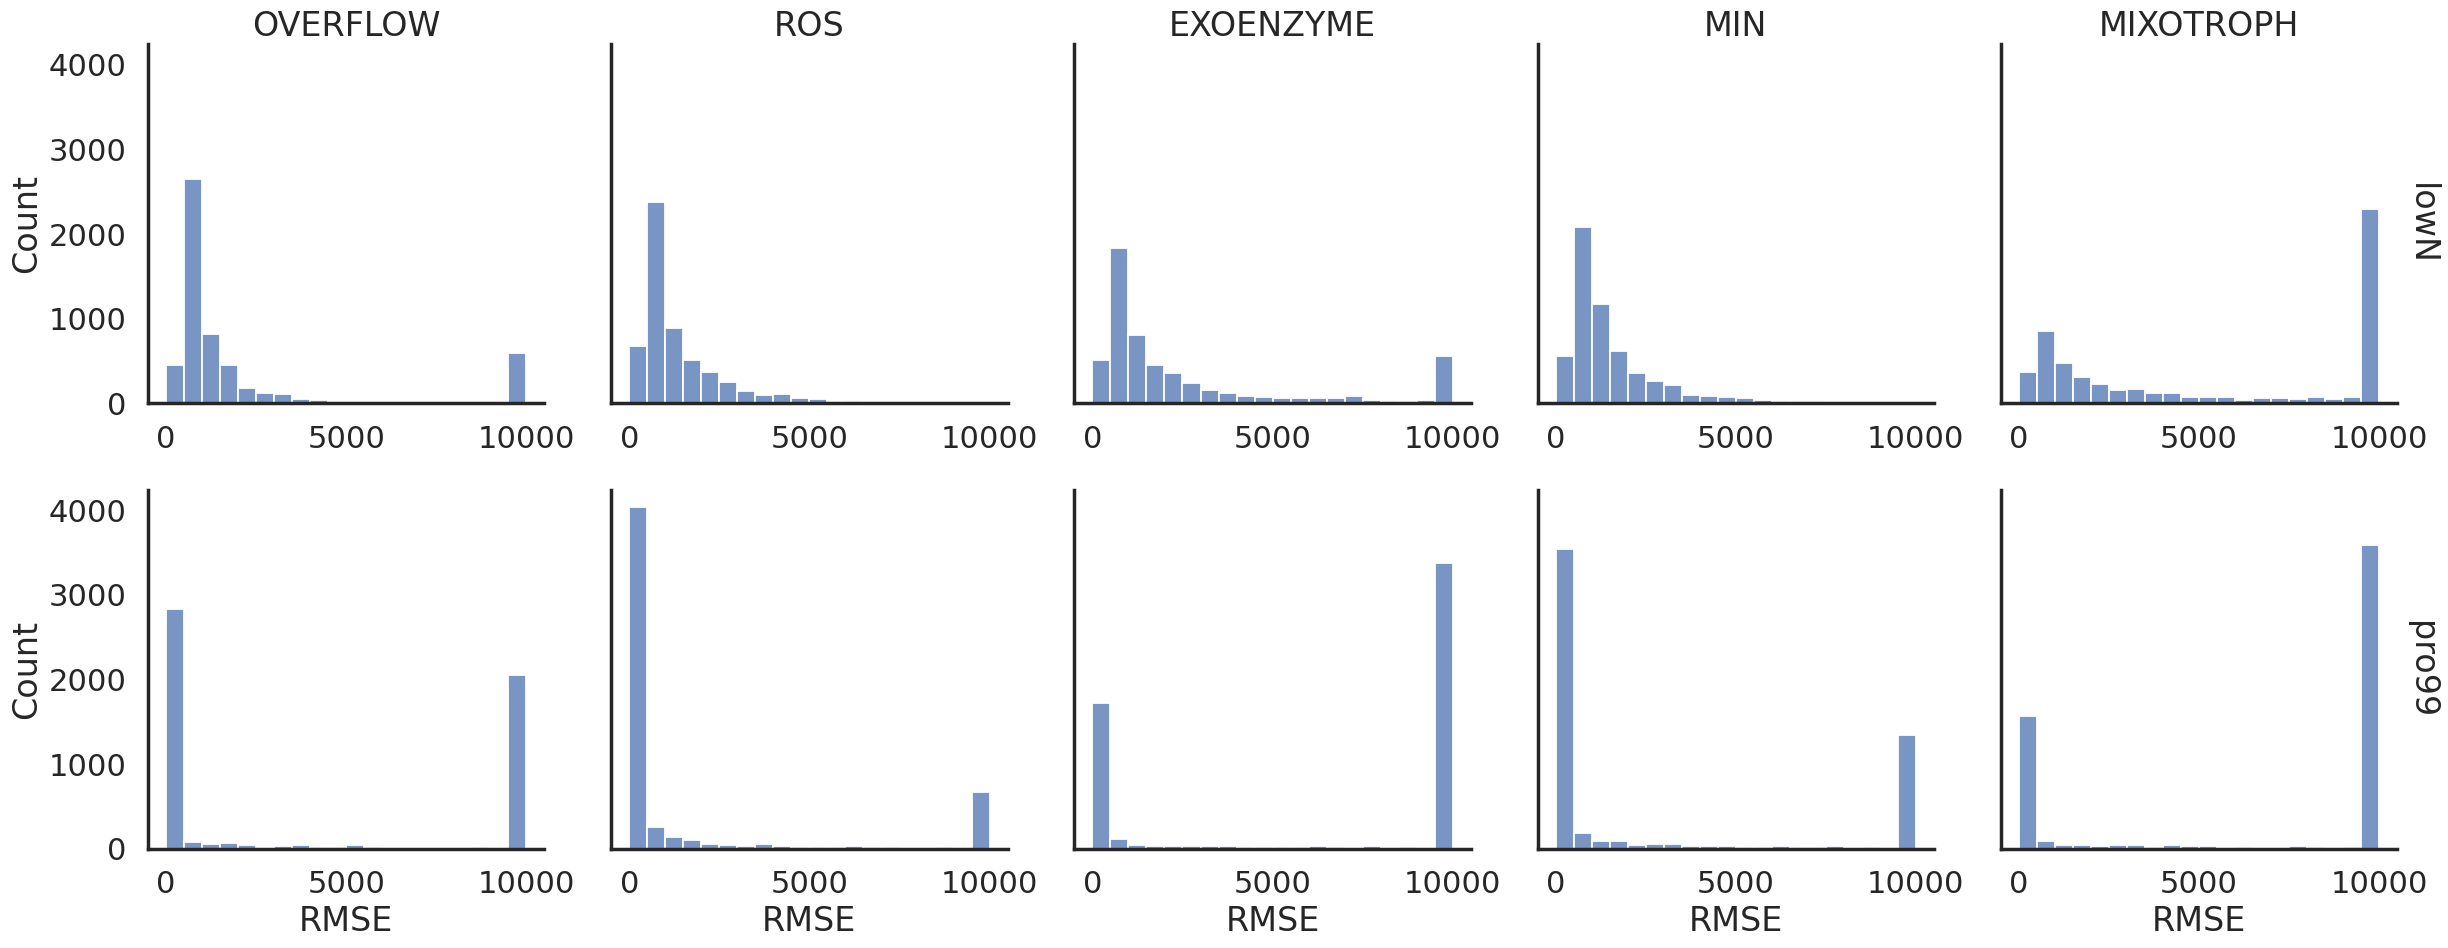

In [26]:
sns.displot(
    data=mse_df, x='RMSE',
    col='model', row='media',
    facet_kws=dict(sharex=False, margin_titles=True),
).set_titles(col_template='{col_name}', row_template='{row_name}')

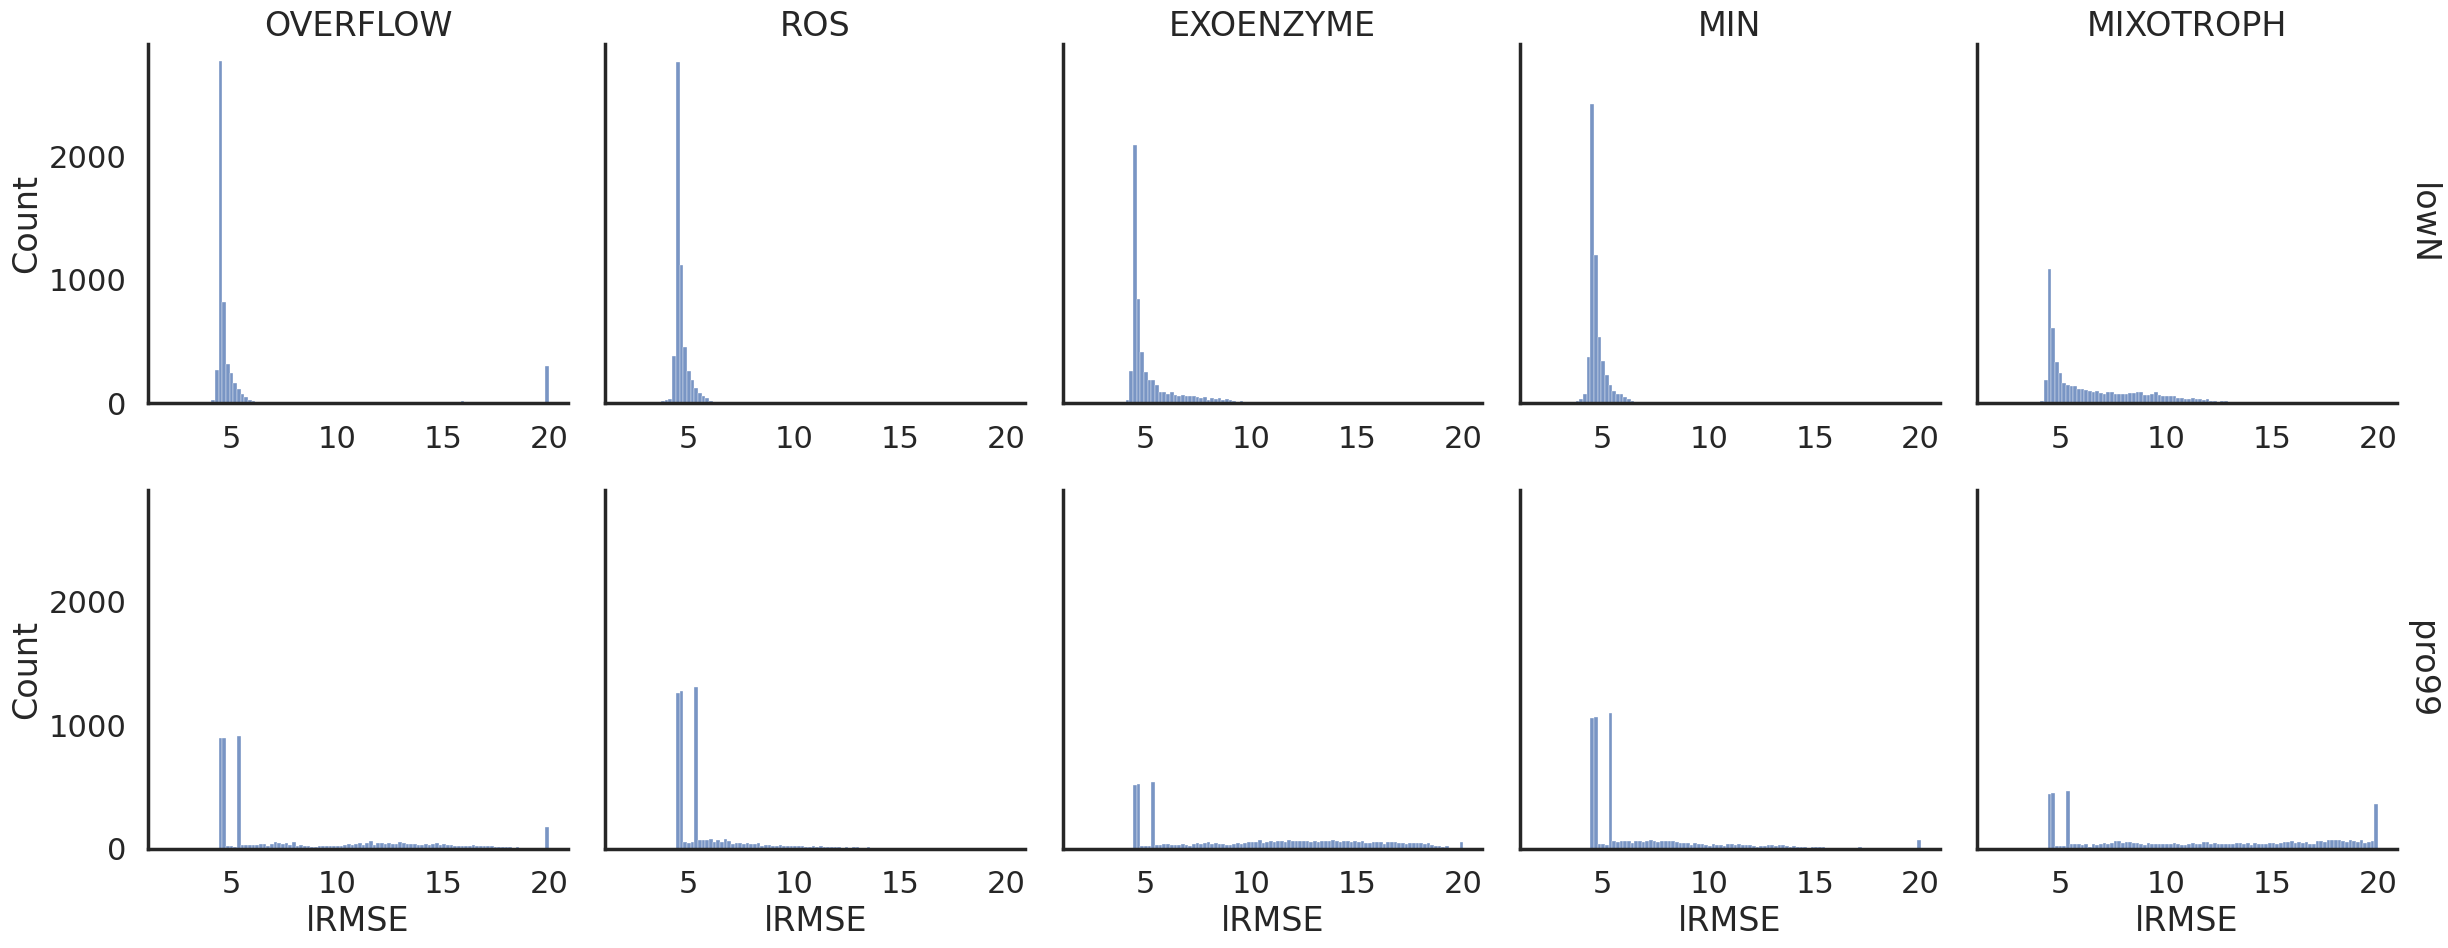

In [27]:
sns.displot(
    data=mse_df, x='lRMSE',
    col='model', row='media',
    facet_kws=dict(sharex=False, margin_titles=True),
).set_titles(col_template='{col_name}', row_template='{row_name}')

In [28]:
sum_df['model'].value_counts()

MIXOTROPH    3846
MIN          3826
EXOENZYME    3785
ROS          3750
OVERFLOW     3646
Name: model, dtype: int64

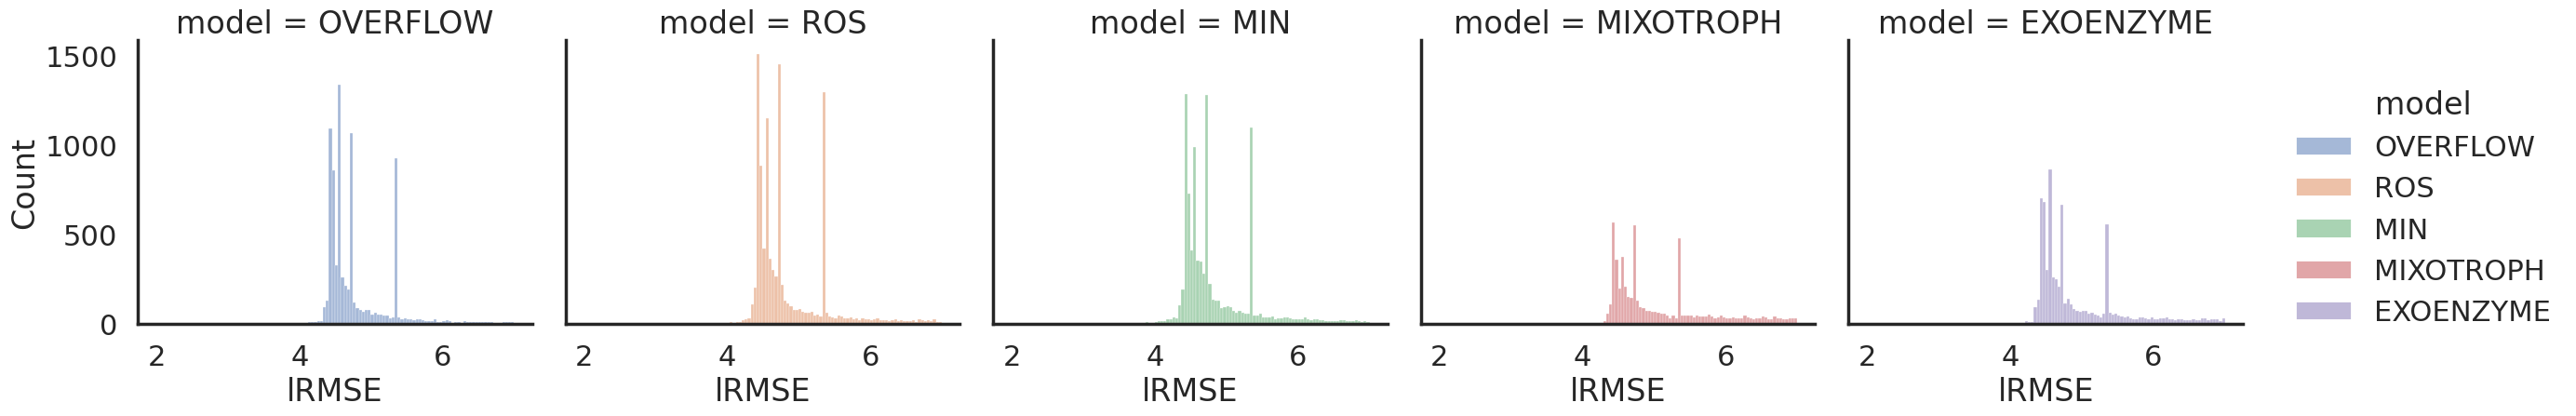

In [40]:
sns.displot(data=mse_df.loc[mse_df.lRMSE < 7], x='lRMSE', hue='model', #fill=None, 
            col='model')
#plt.xlim((20,30))

In [43]:
mse_df.loc[mse_df.lRMSE < 5].groupby('model').id.nunique()

model
EXOENZYME    1316
MIN          1679
MIXOTROPH     845
OVERFLOW     1530
ROS          1703
Name: id, dtype: int64

In [38]:
runid = 'shgo2_sobol_267'
model = 'OVERFLOW'
mse_df.loc[mse_df.id.isin([runid]) & mse_df.model.isin([model])
          ]

,Sample,full name,Group,RMSE_Bptotal[N],RMSE_Bptotal[C],RMSE_log_Bptotal[N],RMSE_log_Bptotal[C],compare_points,RMSE,lRMSE,run_id,id,media,which,model,hash
0,1A0,Axenic,Axenic,10.819008,71.855336,2.362204,1.897004,74.0,777.403477,4.481110,shgo2_sobol_267_lowN_ponly_OVERFLOW_h-20743845...,shgo2_sobol_267,lowN,ponly,OVERFLOW,h-2074384540759412348
1,1B0,Axenic,Axenic,11.527659,76.699782,2.381689,1.930720,74.0,884.168919,4.598375,shgo2_sobol_267_lowN_ponly_OVERFLOW_h-20743845...,shgo2_sobol_267,lowN,ponly,OVERFLOW,h-2074384540759412348
2,1C0,Axenic,Axenic,11.617132,77.332834,2.386123,1.934767,74.0,898.385735,4.616591,shgo2_sobol_267_lowN_ponly_OVERFLOW_h-20743845...,shgo2_sobol_267,lowN,ponly,OVERFLOW,h-2074384540759412348
21648,1A0,Axenic,Axenic,114.417160,772.806574,3.217431,3.816459,2.0,10000.000000,12.279195,shgo2_sobol_267_pro99_ponly_OVERFLOW_h-2074384...,shgo2_sobol_267,pro99,ponly,OVERFLOW,h-2074384540759412348
21649,1B0,Axenic,Axenic,114.417160,772.768818,3.217431,3.935864,2.0,10000.000000,12.663371,shgo2_sobol_267_pro99_ponly_OVERFLOW_h-2074384...,shgo2_sobol_267,pro99,ponly,OVERFLOW,h-2074384540759412348
21650,1C0,Axenic,Axenic,114.417160,772.889634,3.217431,3.766618,2.0,10000.000000,12.118834,shgo2_sobol_267_pro99_ponly_OVERFLOW_h-2074384...,shgo2_sobol_267,pro99,ponly,OVERFLOW,h-2074384540759412348


In [33]:
sum_df.columns

Index(['Mh', 'Mp', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'E_leakp', 'E_leakh',
       'KONp', 'KINp', 'KOCp', 'KICp', 'KONh', 'KINh', 'KOCh', 'KICh',
       'VmaxONp', 'VmaxINp', 'VmaxOCp', 'VmaxICp', 'VmaxONh', 'VmaxINh',
       'VmaxOCh', 'VmaxICh', 'OverflowMode', 'E_ROSp', 'E_ROSh', 'VmaxROSh',
       'K_ROSh', 'ROS_decay', 'KABp', 'KABh', 'EABp', 'EABh', 'decayABh',
       'decayABp', 'MABp', 'MABh', 'r0p', 'r0h', 'bp', 'bh', 'QNmaxp',
       'QNminp', 'QNmaxh', 'QNminh', 'Kmtbp', 'Kmtbh', 'gamma_DON2DINp',
       'gamma_DON2DINh', 'QCmaxp', 'QCminp', 'QCmaxh', 'QCminh', 'ROSMode',
       'omegaP', 'omegaH', 'run_id', 'id', 'media', 'which', 'model', 'hash'],
      dtype='object')

In [58]:
mdf = df.loc[df.RMSE < 100].melt( id_vars=['SSE', 'model', 'RMSE', 'error_bin'])

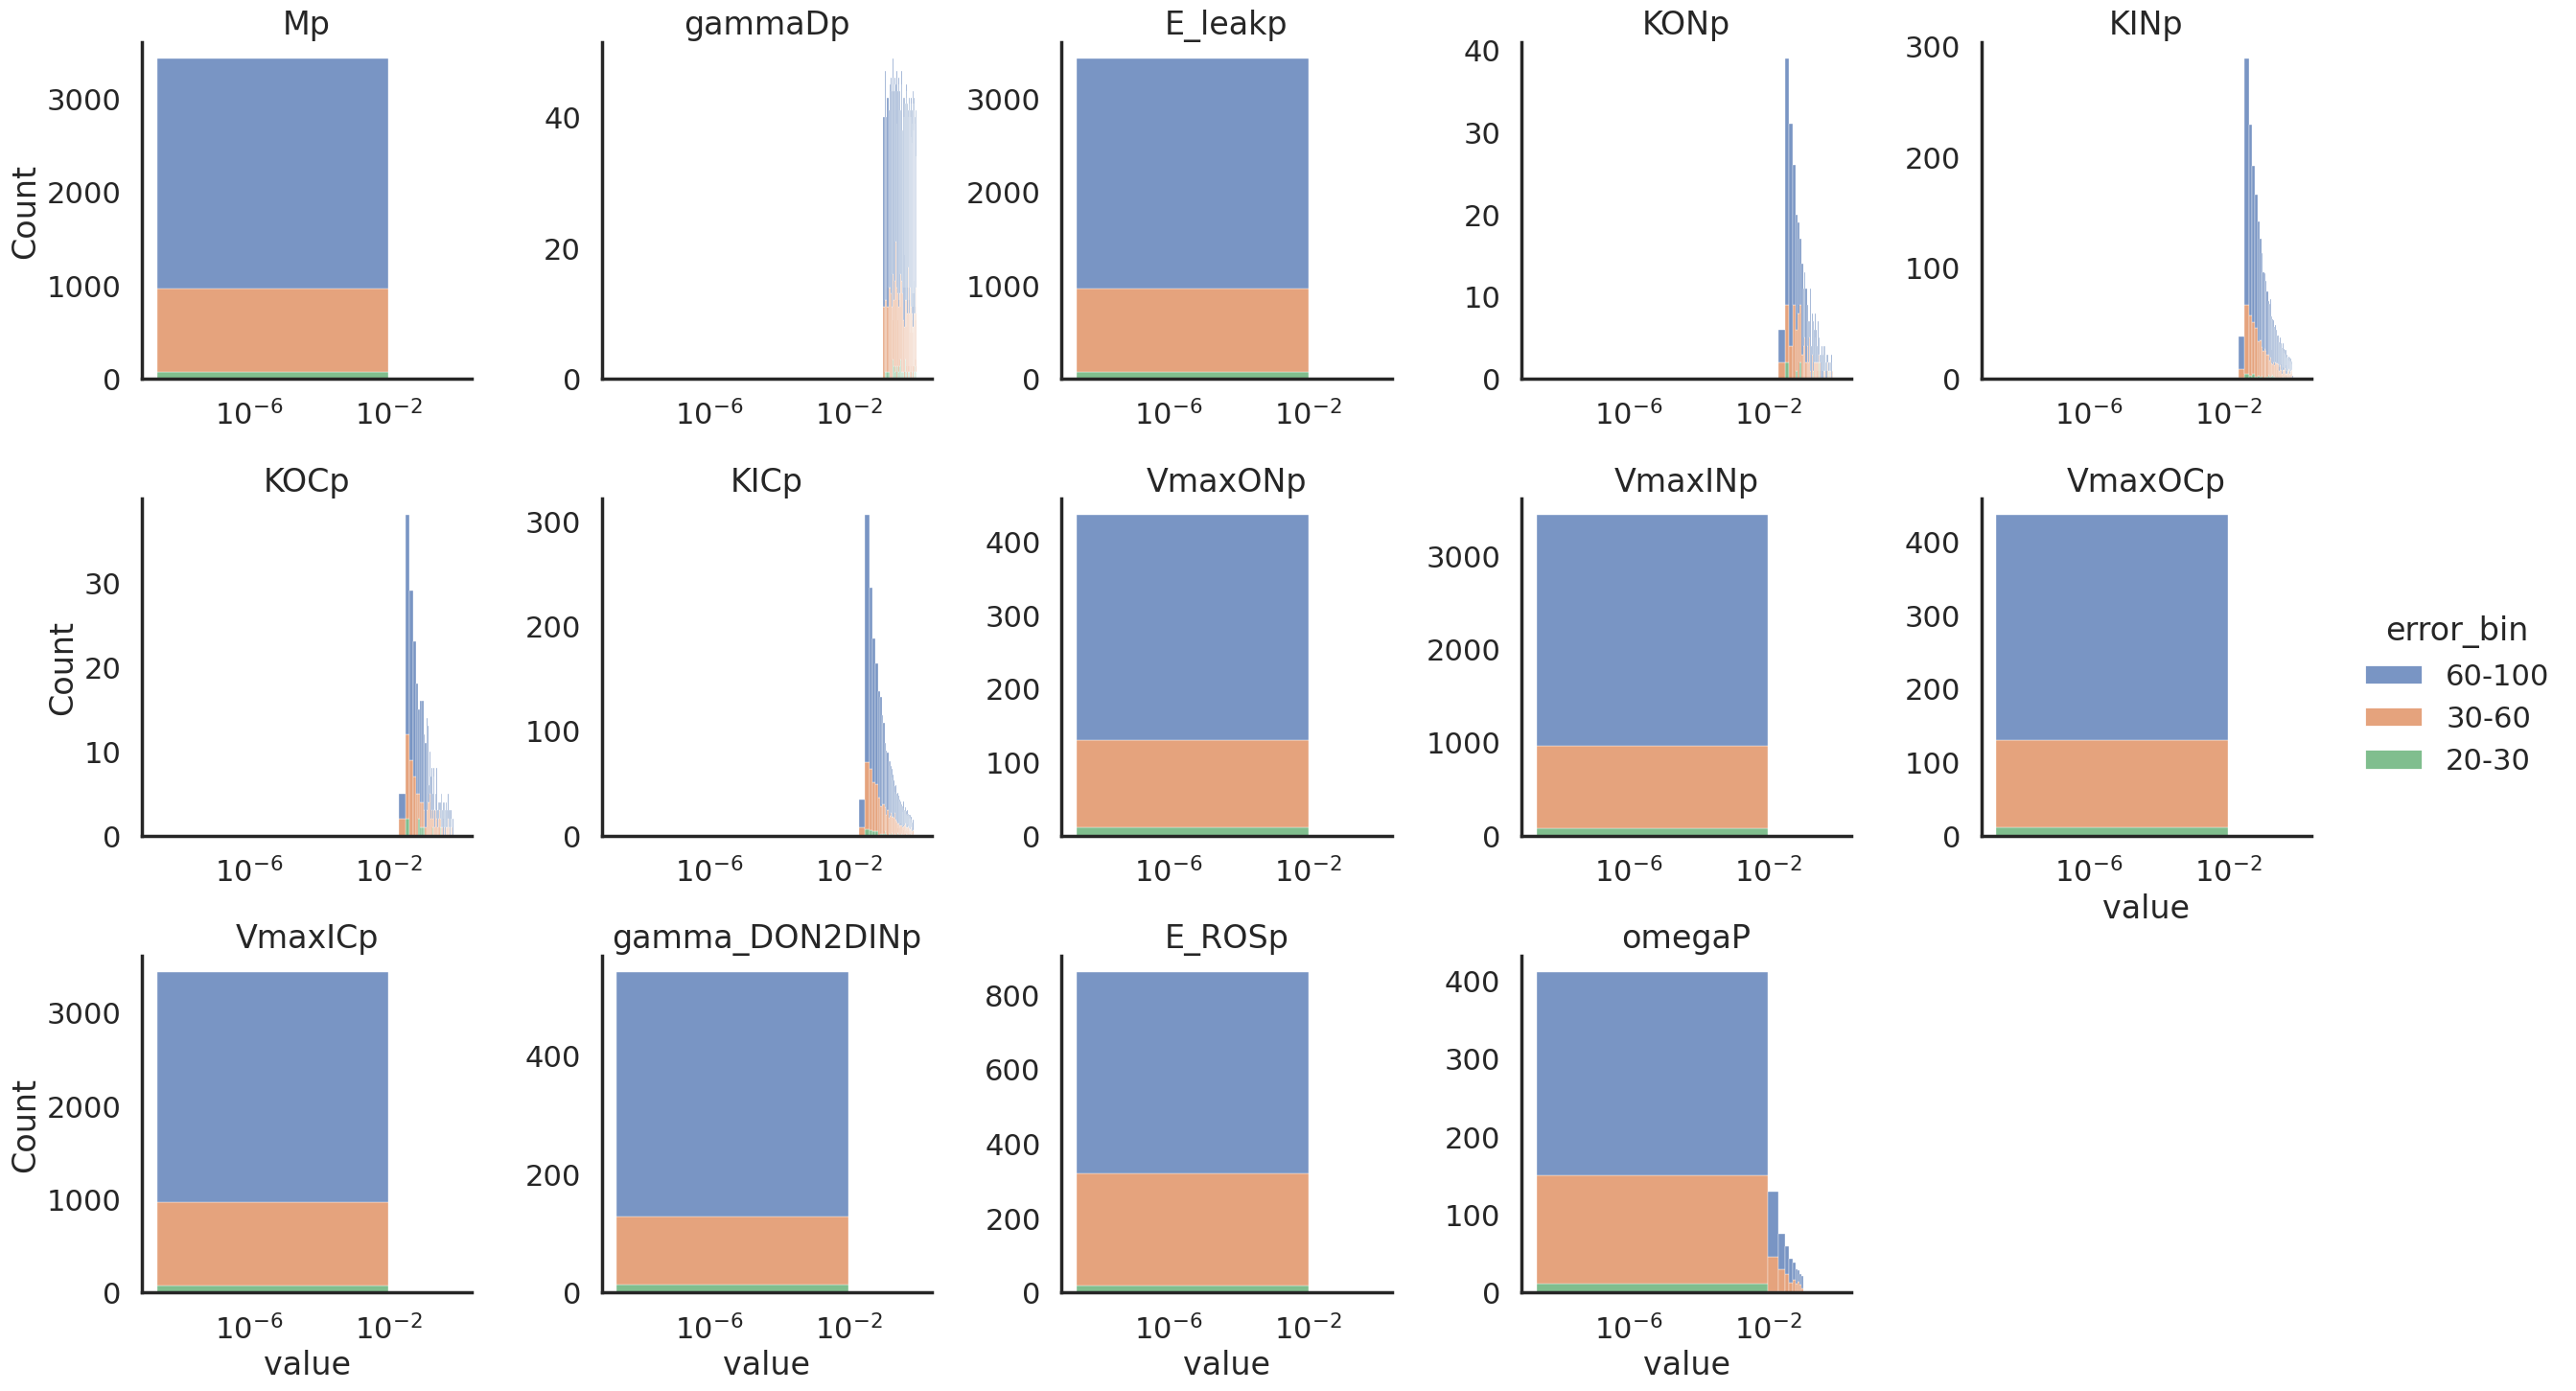

In [67]:
sns.displot(data=mdf, x='value', col='variable', #row='model',
            hue='error_bin', col_wrap=5,#sharex=False,
            facet_kws=dict(sharex=False, sharey=False), multiple='stack',
           # fill=None, 
           ).set(xscale='log').set_titles(col_template='{col_name}')


In [75]:
df['rank'] = df.groupby("model")["RMSE"].transform("rank")

In [96]:
min_rows = df.loc[df['rank'].le(50)]
min_rows

,Mp,gammaDp,E_leakp,KONp,KINp,KOCp,KICp,VmaxONp,VmaxINp,VmaxOCp,VmaxICp,SSE,model,gamma_DON2DINp,E_ROSp,omegaP,RMSE,error_bin,rank
28,0.000003,0.850003,4.636119e-06,0.077097,0.348302,0.243838,0.138073,0.000007,0.000031,0.000200,0.001309,697162.104662,MIXOTROPH,NaN,NaN,NaN,41.958436,30-60,37.0
51,0.000004,0.216180,2.974278e-06,0.576114,0.053739,0.039112,0.111593,0.000026,0.000065,0.000039,0.000297,428930.548519,MIXOTROPH,NaN,NaN,NaN,32.911365,30-60,16.0
91,0.000005,0.353307,8.080768e-07,0.325589,0.051450,0.284549,0.120626,0.000010,0.000035,0.000021,0.000424,190880.597791,MIXOTROPH,NaN,NaN,NaN,21.954993,20-30,2.0
126,0.000001,0.591045,2.881725e-06,0.085541,0.283136,0.589810,0.069912,0.000002,0.000055,0.000013,0.000403,778900.305012,MIXOTROPH,NaN,NaN,NaN,44.349971,30-60,44.0
180,0.000004,0.619792,3.906284e-06,0.688742,0.241515,0.277479,0.029848,0.000002,0.000036,0.000024,0.000345,695986.576589,MIXOTROPH,NaN,NaN,NaN,41.923047,30-60,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,0.000004,0.578812,3.384532e-07,NaN,0.111686,NaN,0.030077,NaN,0.000028,NaN,0.001030,243430.933062,ROS,NaN,1.950249e-07,0.023849,24.793640,20-30,3.0
5040,0.000003,0.174489,2.931750e-06,NaN,0.384568,NaN,0.413402,NaN,0.000061,NaN,0.000429,462225.746561,ROS,NaN,8.305722e-07,0.013785,34.164846,30-60,44.0
5080,0.000005,0.391876,1.030907e-06,NaN,0.491117,NaN,0.325188,NaN,0.000030,NaN,0.000581,377547.540472,ROS,NaN,2.399572e-06,0.001256,30.877223,30-60,23.0
5086,0.000001,0.409006,1.954267e-06,NaN,0.057284,NaN,0.076334,NaN,0.000054,NaN,0.000309,423441.356554,ROS,NaN,5.919005e-06,0.001997,32.700097,30-60,36.0


In [98]:
min_rows.columns

Index(['Mp', 'gammaDp', 'E_leakp', 'KONp', 'KINp', 'KOCp', 'KICp', 'VmaxONp',
       'VmaxINp', 'VmaxOCp', 'VmaxICp', 'SSE', 'model', 'gamma_DON2DINp',
       'E_ROSp', 'omegaP', 'RMSE', 'error_bin', 'rank'],
      dtype='object')

In [99]:
def write_json(x):
    fpath = os.path.join(dpath,f"pro_x0_{x['model']}_{x['rank']:g}.json")
    x = x.dropna()
    x= x.drop(['SSE', 'model',  'RMSE', 'error_bin', 'rank'])
    d = x.to_dict()
    params2json(d, fpath)
    print(fpath, d)

min_rows.apply(write_json, axis=1)
    

/fast_data/Osnat/RECYCLE_MODEL/results/shgo/out/pro_x0_MIXOTROPH_37.json {'Mp': 2.760823839763571e-06, 'gammaDp': 0.8500027604401111, 'E_leakp': 4.63611905068582e-06, 'KONp': 0.0770969007920176, 'KINp': 0.3483016581934989, 'KOCp': 0.2438379555375002, 'KICp': 0.138073037176524, 'VmaxONp': 7.49061037286846e-06, 'VmaxINp': 3.1188503677522386e-05, 'VmaxOCp': 0.0002001829967199, 'VmaxICp': 0.0013094432899841}
/fast_data/Osnat/RECYCLE_MODEL/results/shgo/out/pro_x0_MIXOTROPH_16.json {'Mp': 3.805979717205404e-06, 'gammaDp': 0.2161796323955059, 'E_leakp': 2.974277600986134e-06, 'KONp': 0.5761140756113942, 'KINp': 0.0537387512828903, 'KOCp': 0.0391122610394401, 'KICp': 0.1115931803377409, 'VmaxONp': 2.6229421544423136e-05, 'VmaxINp': 6.523152297179402e-05, 'VmaxOCp': 3.924904949759313e-05, 'VmaxICp': 0.0002973756047624}
/fast_data/Osnat/RECYCLE_MODEL/results/shgo/out/pro_x0_MIXOTROPH_2.json {'Mp': 5.011892642303526e-06, 'gammaDp': 0.353307431191206, 'E_leakp': 8.080768498975535e-07, 'KONp': 0.32

28      None
51      None
91      None
126     None
180     None
        ... 
5039    None
5040    None
5080    None
5086    None
5107    None
Length: 250, dtype: object